In [ ]:
#Imports
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.feature_selection import SelectPercentile, mutual_info_regression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, explained_variance_score, mean_absolute_percentage_error
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import KFold

In [ ]:
#Drive Mount
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


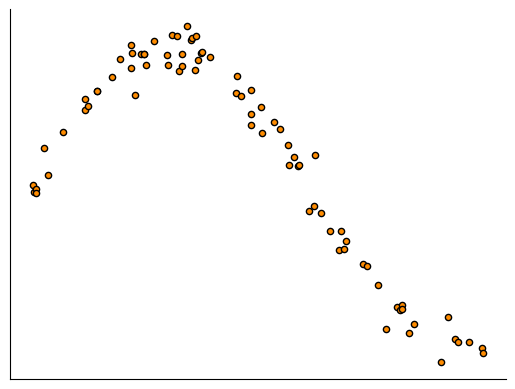

In [ ]:
#Random data set generation & plot

np.random.seed(30) #Fix the randomness
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])


X = X.reshape(-1,1)
y = y.reshape(-1,1)

y = y.ravel()


plt.scatter(X, y, s=20, edgecolor="black", c="darkorange")
plt.tick_params(labelsize=14)
sns.despine()
plt.xticks([])
plt.yticks([])
plt.show()

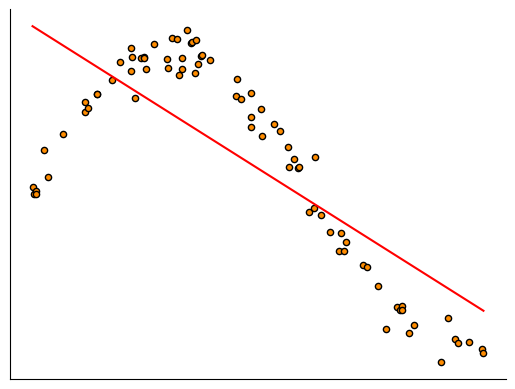

In [ ]:
#Linear regression

regressor = LinearRegression()
regressor.fit(X,y)

y_predLR = regressor.predict(X)

plt.scatter(X, y, s=20, edgecolor="black", c="darkorange")
plt.plot(X,y_predLR,color = 'r')
plt.xticks([])
plt.yticks([])
sns.despine()
plt.show()

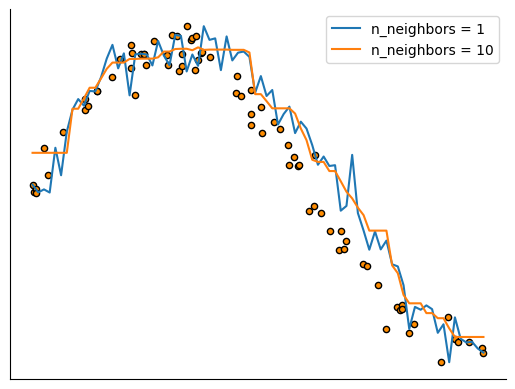

In [ ]:
# KNN
#Comparison with 1 and 10 neighbours
KNMin = 1
KNMax = 10
modelKNNMin = KNeighborsRegressor(n_neighbors=KNMin)
modelKNNMax = KNeighborsRegressor(n_neighbors=KNMax)

# Train a KNN regression model for each value of k
modelKNNMin.fit(X, y)
modelKNNMax.fit(X, y)

y_predKNNMin = modelKNNMin.predict(X)
y_predKNNMax = modelKNNMax.predict(X)

plt.scatter(X, y, s=20, edgecolor="black", c="darkorange")
plt.plot(np.linspace(min(X), max(X), len(X)), y_predKNNMin, label='n_neighbors = '+str(KNMin))
plt.plot(np.linspace(min(X), max(X), len(X)), y_predKNNMax, label='n_neighbors = '+str(KNMax))
plt.legend()
plt.xticks([])
plt.yticks([])
sns.despine()
plt.show()

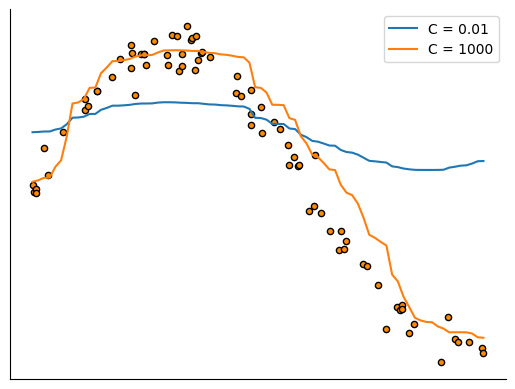

In [ ]:
#Support vector regression (SVR)
#Sensibility to regularization parameter

# Create SVM regression models with different values of C
CMin = 0.01
CMax = 1000
modelSVRCMin = SVR(C=CMin)
modelSVRCMax = SVR(C=CMax)

# Train the SVM regression models
modelSVRCMin.fit(X, y)
modelSVRCMax.fit(X, y)

# Predict using the trained SVM models
y_pred_SVRCMin = modelSVRCMin.predict(X)
y_pred_SVRCMax = modelSVRCMax.predict(X)

# Plot the results
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange")
plt.plot(np.linspace(min(X), max(X), len(X)), y_pred_SVRCMin, label='C = '+str(CMin))
plt.plot(np.linspace(min(X), max(X), len(X)), y_pred_SVRCMax, label='C = '+str(CMax))
plt.legend()
plt.xticks([])
plt.yticks([])
sns.despine()
plt.show()

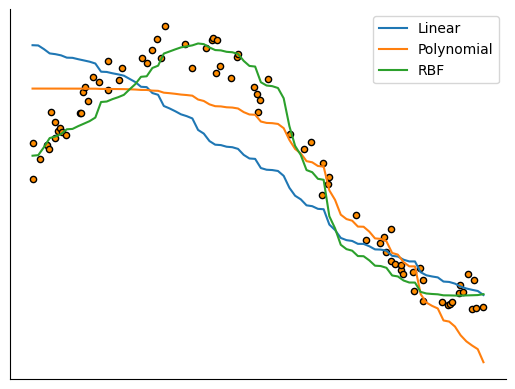

In [ ]:
#Support vector regression (SVR)
#Kernel sensitivity

# Create SVM regression models with different values of C
CMin = 1000
modelSVRKLinear = SVR(C=CMin, kernel = 'linear')
modelSVRKPoly = SVR(C=CMin, kernel = 'poly')
modelSVRKRBF = SVR(C=CMin) #Default kernel = Rbf



# Train the SVM regression models
modelSVRKLinear.fit(X, y)
modelSVRKPoly.fit(X, y)
modelSVRKRBF.fit(X, y)


# Predict using the trained SVM models
y_pred_SVRKLinear = modelSVRKLinear.predict(X)
y_pred_SVRKPoly = modelSVRKPoly.predict(X)
y_pred_SVRKRBF = modelSVRKRBF.predict(X)

# Plot the results
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange")
plt.plot(np.linspace(min(X), max(X), len(X)), y_pred_SVRKLinear, label='Linear')
plt.plot(np.linspace(min(X), max(X), len(X)), y_pred_SVRKPoly, label='Polynomial')
plt.plot(np.linspace(min(X), max(X), len(X)), y_pred_SVRKRBF, label='RBF')

plt.legend()
plt.xticks([])
plt.yticks([])
sns.despine()
plt.show()

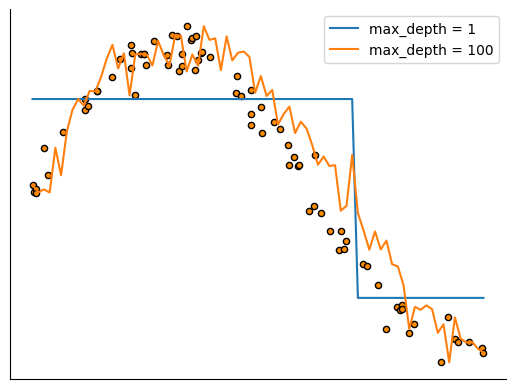

In [ ]:
# Decision tree model

#Max_depth

MaxDepthMin=1
MaxDepthMax=100
modelTreeDepthMin = DecisionTreeRegressor(max_depth = MaxDepthMin)
modelTreeDepthMax = DecisionTreeRegressor(max_depth = MaxDepthMax)

# Train a Decision Tree regression model for each max depth
modelTreeDepthMin.fit(X, y)
modelTreeDepthMax.fit(X, y)

y_predTreeMin = modelTreeDepthMin.predict(X)
y_predTreeMax = modelTreeDepthMax.predict(X)

plt.scatter(X, y, s=20, edgecolor="black", c="darkorange")
plt.plot(np.linspace(min(X), max(X), len(X)), y_predTreeMin, label= "max_depth = " + str(MaxDepthMin))
plt.plot(np.linspace(min(X), max(X), len(X)), y_predTreeMax, label=  "max_depth = " + str(MaxDepthMax))
plt.legend()
plt.xticks([])
plt.yticks([])
sns.despine()
plt.show()

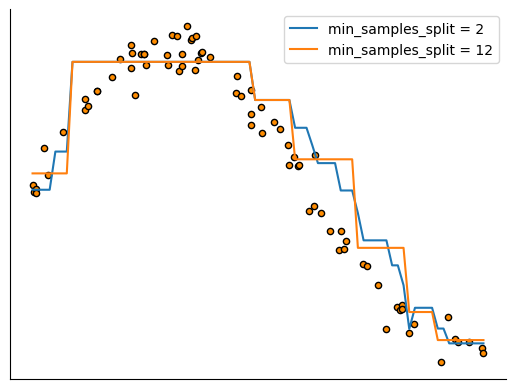

In [ ]:
# Decision tree model

#Min_samples
MaxDepth= 4
MinSamplesSplit=2
MaxSamplesSplit=12
modelTreeSamplesMin = DecisionTreeRegressor(max_depth = MaxDepth, min_samples_split = MinSamplesSplit)
modelTreeSamplesMax = DecisionTreeRegressor(max_depth = MaxDepth, min_samples_split = MaxSamplesSplit)

# Train a Decision Tree regression model for each max depth
modelTreeSamplesMin.fit(X, y)
modelTreeSamplesMax.fit(X, y)

y_predTreeMin = modelTreeSamplesMin.predict(X)
y_predTreeMax = modelTreeSamplesMax.predict(X)

plt.scatter(X, y, s=20, edgecolor="black", c="darkorange")
plt.plot(np.linspace(min(X), max(X), len(X)), y_predTreeMin, label= "min_samples_split = " + str(MinSamplesSplit))
plt.plot(np.linspace(min(X), max(X), len(X)), y_predTreeMax, label=  "min_samples_split = " + str(MaxSamplesSplit))
plt.legend()
plt.xticks([])
plt.yticks([])
sns.despine()
plt.show()

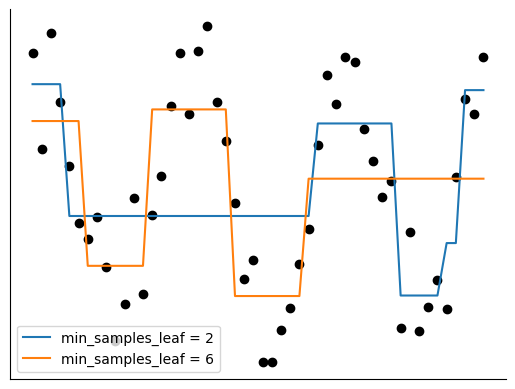

In [ ]:
# Decision tree model

#Min_samples_leaf
MaxDepth= 4
MinSamplesSplit=5
MinSamplesLeaf = 2
MaxSamplesLeaf = 6
modelTreeLeafMin = DecisionTreeRegressor(max_depth = MaxDepth, min_samples_split = MinSamplesSplit, min_samples_leaf = MinSamplesLeaf)
modelTreeLeafMax = DecisionTreeRegressor(max_depth = MaxDepth, min_samples_split = MinSamplesSplit, min_samples_leaf = MaxSamplesLeaf)

# Train a Decision Tree regression model for each max depth
modelTreeLeafMin.fit(X, y)
modelTreeLeafMax.fit(X, y)

y_predTreeMin = modelTreeLeafMin.predict(X)
y_predTreeMax = modelTreeLeafMax.predict(X)

plt.scatter(X, y, color='black')  # Set the color to black for scatter points
plt.plot(np.linspace(min(X), max(X), len(X)), y_predTreeMin, label= "min_samples_leaf = " + str(MinSamplesLeaf))
plt.plot(np.linspace(min(X), max(X), len(X)), y_predTreeMax, label=  "min_samples_leaf = " + str(MaxSamplesLeaf))
plt.legend()
plt.xticks([])
plt.yticks([])
sns.despine()
plt.show()

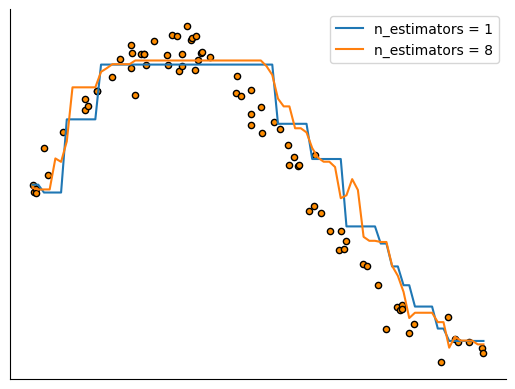

In [ ]:
# Random Forest models

#The number of estimators is the number of decision trees that are being used
MinEstimator = 1
MaxEstimator = 8
modelRFMinEst = RandomForestRegressor(n_estimators=MinEstimator, max_depth = 4)
modelRFMaxEst = RandomForestRegressor(n_estimators=MaxEstimator, max_depth = 4)

# Train a Random Forest regression model for each n_estimators value
modelRFMinEst.fit(X, y)
modelRFMaxEst.fit(X, y)

y_predRFMinEst = modelRFMinEst.predict(X)
y_predRFMaxEst = modelRFMaxEst.predict(X)

plt.scatter(X, y, s=20, edgecolor="black", c="darkorange")
plt.plot(np.linspace(min(X), max(X), len(X)), y_predRFMinEst, label= 'n_estimators = ' + str(MinEstimator))
plt.plot(np.linspace(min(X), max(X), len(X)), y_predRFMaxEst, label='n_estimators = ' + str(MaxEstimator))
plt.legend()
plt.xticks([])
plt.yticks([])
sns.despine()
plt.show()

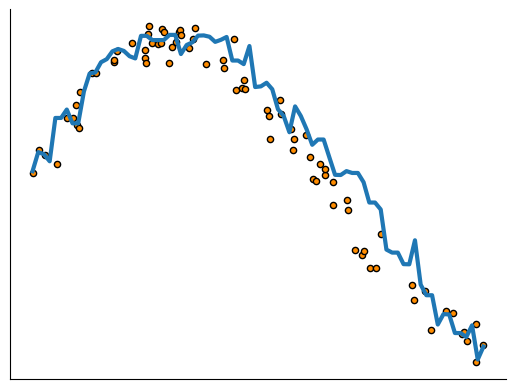

In [ ]:
# Gradient Boosting

# Section to generate only one model for picture generation/ algorithm explanation
modelGB = GradientBoostingRegressor(n_estimators=100)

# Train a Gradient Boosting regression model for each n_estimators value
modelGB.fit(X, y)

y_predGB = modelGB.predict(X)

plt.scatter(X, y, s=20, edgecolor="black", c="darkorange") # Set the color to black for scatter points
plt.plot(np.linspace(min(X), max(X), len(X)), y_predGB, linewidth=3)
plt.xticks([])
plt.yticks([])
sns.despine()
plt.show()

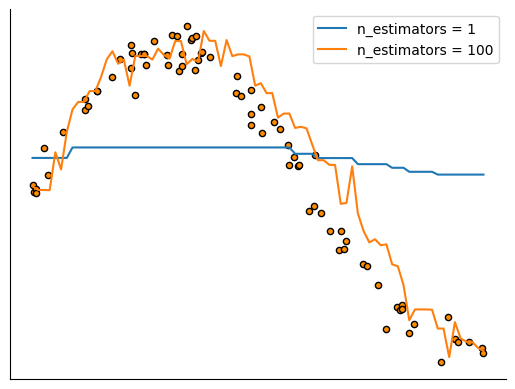

In [ ]:
# Gradient Boosting

MinEstimators = 1
MaxEstimators = 100

modelGBMinEst = GradientBoostingRegressor(n_estimators=MinEstimators)
modelGBMaxEst = GradientBoostingRegressor(n_estimators=MaxEstimators)

# Train a Gradient Boosting regression model for each n_estimators value
modelGBMinEst.fit(X, y)
modelGBMaxEst.fit(X, y)

y_predGBMinEst = modelGBMinEst.predict(X)
y_predGBMaxEst = modelGBMaxEst.predict(X)

plt.scatter(X, y, s=20, edgecolor="black", c="darkorange") # Set the color to black for scatter points
plt.plot(np.linspace(min(X), max(X), len(X)), y_predGBMinEst, label= 'n_estimators = ' + str(MinEstimators))
plt.plot(np.linspace(min(X), max(X), len(X)), y_predGBMaxEst, label= 'n_estimators = ' + str(MaxEstimators))
plt.legend()
plt.xticks([])
plt.yticks([])
sns.despine()
plt.show()

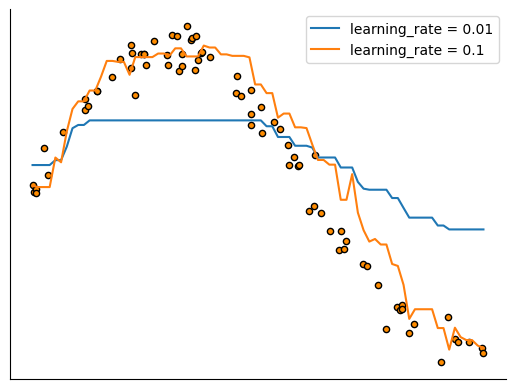

In [ ]:
# Gradient Boosting
#learning rate

Estimators = 50
MinLR = 0.01
MaxLR = 0.1

modelGBMinLR = GradientBoostingRegressor(n_estimators=Estimators, learning_rate = MinLR)
modelGBMaxLR = GradientBoostingRegressor(n_estimators=Estimators, learning_rate = MaxLR)

# Train a Gradient Boosting regression model for each n_estimators value
modelGBMinLR.fit(X, y)
modelGBMaxLR.fit(X, y)

y_predGBMinLR = modelGBMinLR.predict(X)
y_predGBMaxLR = modelGBMaxLR.predict(X)

plt.scatter(X, y, s=20, edgecolor="black", c="darkorange") # Set the color to black for scatter points
plt.plot(np.linspace(min(X), max(X), len(X)), y_predGBMinLR, label= 'learning_rate = ' + str(MinLR))
plt.plot(np.linspace(min(X), max(X), len(X)), y_predGBMaxLR, label= 'learning_rate = ' + str(MaxLR))
plt.legend()
plt.xticks([])
plt.yticks([])
sns.despine()
plt.show()